<a href="https://colab.research.google.com/github/Jeevanantham-787898/plantling_prediction_cnn/blob/main/Plant_seedling_cassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the necessary library
!pip install -U -q PyDrive

# Import libraries
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/gdrive')




Mounted at /content/gdrive


In [3]:
dataset_path = '/content/gdrive/My Drive/plantling_dataset'

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Create directories for train and test splits
train_dir = '/content/train'
test_dir = '/content/test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List of class directories
classes = os.listdir(dataset_path)

# Split each class folder into train and test sets
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    images = os.listdir(class_dir)

    # Split images into train and test (80-20 split)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class-specific subdirectories in train and test folders
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Copy the images to the appropriate directories
    for image in train_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(train_dir, class_name))
    for image in test_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(test_dir, class_name))


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

# Save the model
model.save('/content/gdrive/My Drive/plant_seedling_cnn_model.h5')


Found 4462 images belonging to 12 classes.
Found 1122 images belonging to 12 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.2346 - loss: 2.2758 - val_accuracy: 0.4973 - val_loss: 1.5058
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.4810 - loss: 1.5010 - val_accuracy: 0.6390 - val_loss: 1.1099
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.5843 - loss: 1.2127 - val_accuracy: 0.6872 - val_loss: 0.9694
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.6499 - loss: 1.0288 - val_accuracy: 0.7389 - val_loss: 0.8341
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.6847 - loss: 0.9444 - val_accuracy: 0.7184 - val_loss: 0.7959
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.7052 - loss: 0.8514 - val_accuracy: 0.7834 - val_loss: 0.6643
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - accuracy: 0.7275 - loss: 0.8167 - val_accuracy: 0.8012 - val_loss: 0.6288
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 360s 3s/step - accuracy: 0.7644 - loss: 0.7080 - val_accuracy: 0.752

36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8197 - loss: 0.5850
Test Accuracy: 0.8217


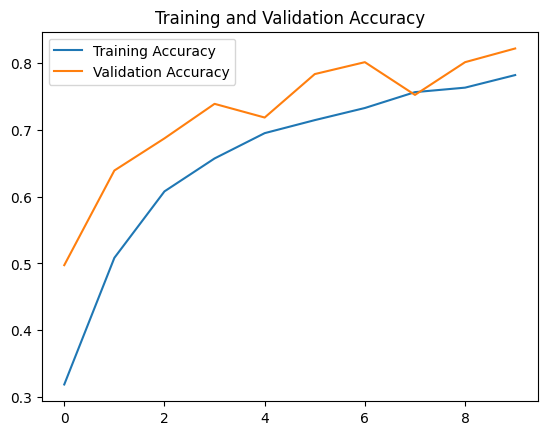

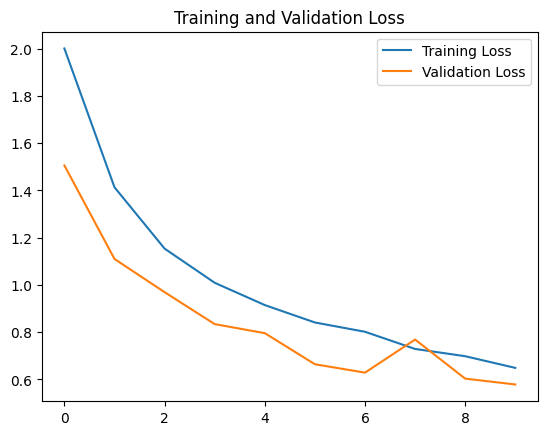

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Plotting training history
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 660ms/step
Confusion Matrix:
[[ 3  8  2  5  2 10  7  3  9  1  7  5]
 [ 3  9  7 13  9 10  4 10 10  1  7  8]
 [ 2  6  3  4  2 15  8  3 14  0  7  3]
 [ 9 13  7 28  8  9 20 10 11  3 20  7]
 [ 3  2  3  8  2  9  1  2  9  2  4  7]
 [ 5 13  7  9  5 16 13  6 13  4 19  2]
 [ 2 11  4 16  7 17 35  7 20  3 18 15]
 [ 3  5  2  7  2  3  6  7  2  0 10  5]
 [ 3 10  5 10  4 29 18  8 13  2  9 11]
 [ 4  2  1 15  0  8  8  2  4  0  3  8]
 [ 8 10 11 15  4  6 11  9 14  8 10 10]
 [ 6 13  5 15  5  4  9 10  9  3  8  6]]
Classification Report:
                           precision    recall  f1-score   support

              Black-grass       0.06      0.05      0.05        62
                 Charlock       0.09      0.10      0.09        91
                 Cleavers       0.05      0.04      0.05        67
         Common Chickweed       0.19      0.19      0.19       145
             Common wheat       0.04      0.04      0.04        52
                  Fat Hen       0.12      0.1

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/test/Maize/102.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Output the predicted class
class_names = list(train_generator.class_indices.keys())
print(f"The predicted class is: {class_names[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The predicted class is: Maize
